# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## SELECCIÓN DE LOS DATOS A ESTUDIAR

## 1. Renombrado y ordenado del dataframe completo.

In [2]:
# abrimos el archivo con los datos unidos sin tratar
df_completo = pd.read_csv('../resultados/df_completo_sin_tratar.csv', index_col = 0)
df_completo.sample(3)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
16853,521,22-24,Man,China,Master’s degree,Student,1-3 years,C++,A laptop,Never,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, C, C++","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,None,"TensorFlow ,Keras ,PyTorch","Gradient Boosting Machines (xgboost, lightgbm...",NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,NaN,Google Cloud Notebooks (AI Platform / Vertex AI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decorder models (seq2seq, vanilla tran...",NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,

In [3]:
# renombramos las columnas
colum_nuevas = {col :  col.lower().replace(' ', '_') for col in df_completo.columns}
df_completo.rename(columns = colum_nuevas, inplace = True) 

In [4]:
# ordenamos las columnas llamando a una lista con los nombres de las columnas ordenadas
df_completo_ordenado = df_completo.reindex(columns = spv.columnas_ordenadas)
df_completo_ordenado.sample(1)

,time,age,gender,q3,q4,q5,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q11,q12,q13,q14,q15,q16,q17,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q20,q21,q22,q23,q24,q25,q26,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q32,q33,q34,q35,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q41,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
4331,208,25-29,Woman,I do not wish to disclose my location,I prefer not to answer,Data Scientist,5-10 years,Python,Python,Notepad++,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A laptop,None,Never,"Matplotlib ,Seaborn ,Plotly / Plotly Express",< 1 year,PyTorch,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# gusardamos el dataframe con las columnas renombradas y ordenadas
df_completo_ordenado.to_csv('../resultados/df_completo_ordenado.csv')

## 2. Selección de los datos a estudiar

In [6]:
# vemos los perfiles profesionales que tenemos en la encuesta
df_completo_ordenado["q5"].value_counts()

q5
Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: count, dtype: int64

In [7]:
# para nuestra investigación nos quedamos con los correspondientes a Data Analyst
df_da = df_completo_ordenado[df_completo_ordenado["q5"] == "Data Analyst"]
df_da.head()

,time,age,gender,q3,q4,q5,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q11,q12,q13,q14,q15,q16,q17,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q20,q21,q22,q23,q24,q25,q26,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q32,q33,q34,q35,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q41,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,A laptop,None,Never,"Matplotlib ,Seaborn ,Plotly / Plotly Express",1-2 years,Scikit-learn,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy/Mining,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,"2,000-2,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",NaN,NaN,NaN,

## 3. Análisis Exploratorio de los Datos con gráficos

In [8]:
# seleccionamos la pregunta 8 por dar una idea general de la herramienta más recomendada para data science
df_q8 = df_da['q8'].value_counts().reset_index()
df_q8

,q8,count
0,Python,1587
1,SQL,261
2,R,199
3,C++,22
4,Java,18
5,Other,16
6,C,12
7,MATLAB,11
8,Javascript,9
9,Julia,8


In [9]:
plt.figure()
plt.bar(df_q8['index'], df_q8['q8'], color='turquoise')
plt.xlabel('1er lenguaje recomendado para aspirante a data scientist')
plt.ylabel('nº de recomendaciones') 
plt.xticks(rotation = 'vertical')
plt.show()

KeyError: 'index'

<Figure size 432x288 with 0 Axes>

In [10]:
# filtramos por país para ver si podemos centrar nuestro análisis únicamente en España y vemos que no tenemos suficientes datos para ello.
df_da_esp = df_da[df_da['q3'] == 'Spain']
print(f'Tenemos tan solo {df_da_esp.shape[0]} registros de Data Analysts en España, lo cual se considera una muestra demasiado pequeña, especialmente teniendo en cuenta que la encuesta completa tiene {df_da.shape[0]} registros de Data Analysts')

Tenemos tan solo 28 registros de Data Analysts en España, lo cual se considera una muestra demasiado pequeña, especialmente teniendo en cuenta que la encuesta completa tiene 2301 registros de Data Analysts


In [11]:
# vemos que la encuesta dispone de información de muchos paises
df_da['q3'].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'India', 'Israel', 'Colombia', 'Brazil', 'Ukraine',
       'Pakistan', 'Other', 'Canada', 'Nigeria', 'Tunisia', 'Italy',
       'Spain', 'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Russia',
       'Peru', 'Germany', 'France', 'Greece', 'Taiwan', 'Portugal',
       'Australia', 'Philippines', 'Singapore', 'Netherlands', 'Japan',
       'Mexico', 'Saudi Arabia', 'Argentina', 'Ghana', 'Morocco',
       'Poland', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Viet Nam',
       'United Arab Emirates', 'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Sweden', 'Iraq',
       'Ireland', 'Denmark', 'Uganda', 'Belarus', 'Nepal', 'Austria',
       'Chile', 'Kazakhstan', 'Norway'], dtype=object)

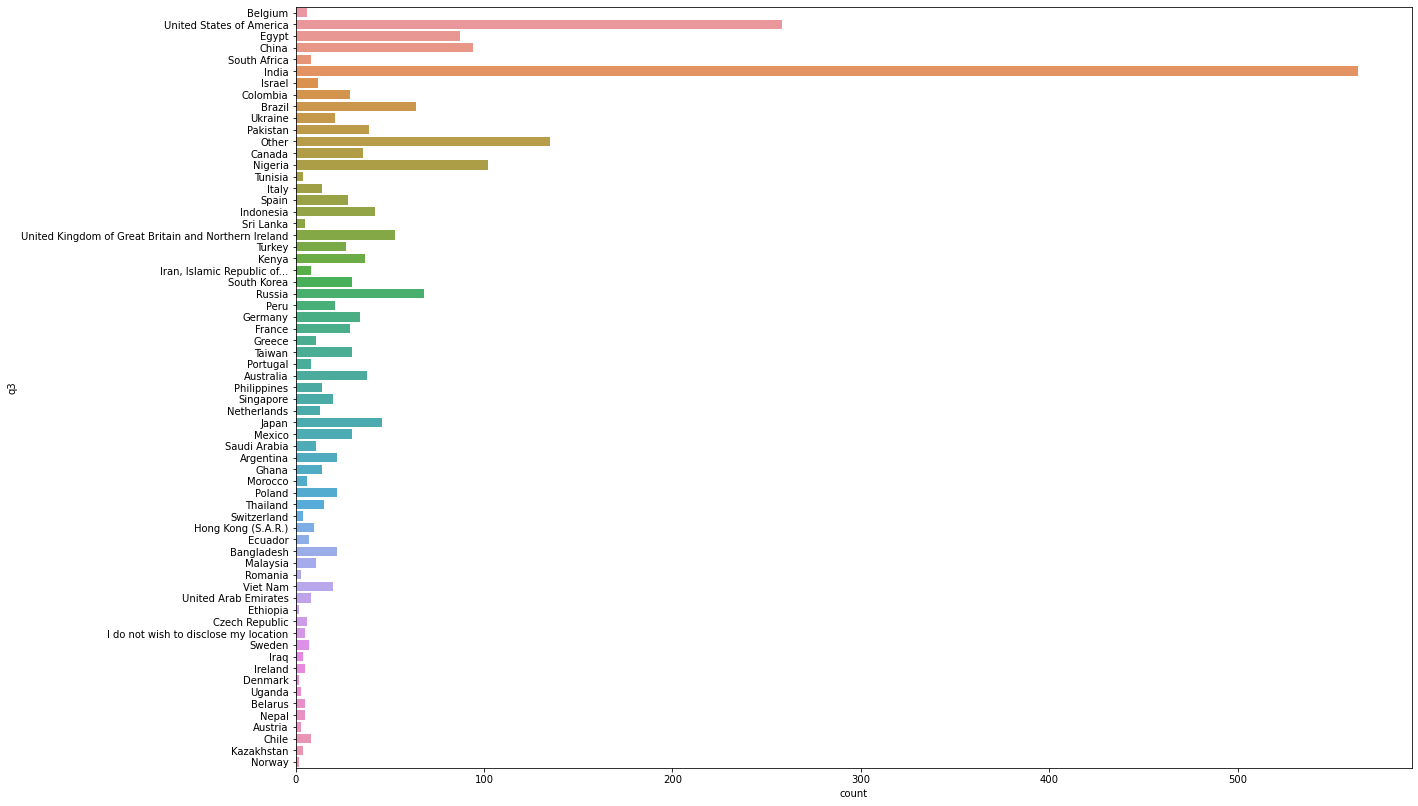

In [12]:
# sacamos la encuesta por países para ver cuales pueden ser los más interesantes para el estudio
plt.figure(figsize=(20,14))

fig = sns.countplot(y = 'q3', data = df_da)

plt.show()

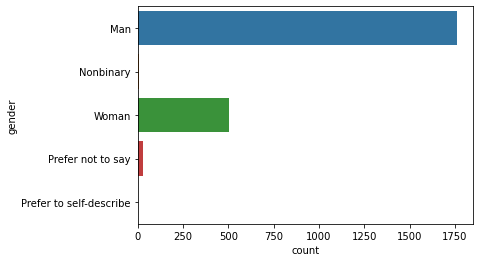

In [13]:
# vemos el número de registros que tenemos de Data Analysts por géneros
sns.countplot(y = 'gender', data = df_da);

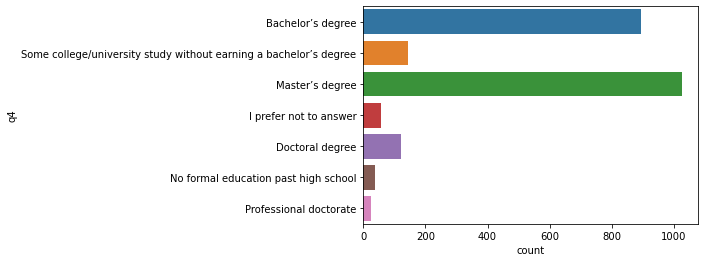

In [14]:
# vemos el número de registros que tenemos de Data Analysts por géneros 
sns.countplot(y = 'q4', data = df_da);

In [15]:
# la pregunta q7 no la podemos analizar en detalle tal y como está pero sí vemos que Python y SQL salen en las respuestas con mayor conteo, por lo que si nos da una idea de que son herramientas adecuadas
df_da['q7'].value_counts()

q7
Python, SQL                                466
Python                                     315
Python, R, SQL                             259
Python, R                                   97
 SQL                                        78
                                          ... 
Python, R, Javascript, MATLAB                1
Python, R, SQL, Julia                        1
Python, R, Javascript, Bash                  1
Python, C, C++, Java, Other                  1
Python, R, SQL, Java, Javascript, Other      1
Name: count, Length: 213, dtype: int64

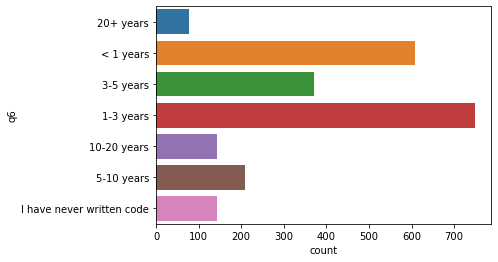

In [16]:
# vemos como se distribuyen los registros de Data Analyst por años de experiencia
sns.countplot(y ='q6', data = df_da);

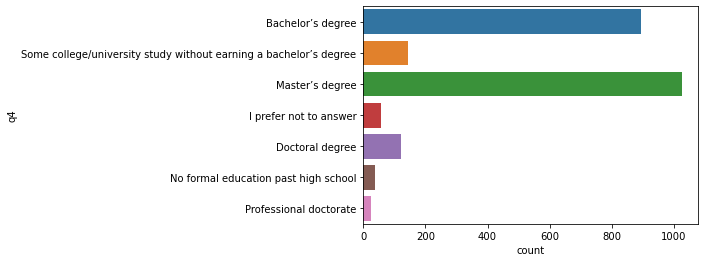

In [17]:
# vemos como se distribuyen los registros de Data Analyst por formación
sns.countplot(y ='q4', data = df_da);

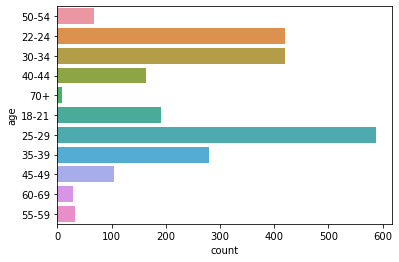

In [18]:
# vemos como se distribuyen los registros de Data Analyst por edad
sns.countplot(y ='age', data = df_da);

In [21]:
# creamos el df con las columnas que hemos seleccionado como las más interesantes para su estudio
df_resumido = df_da[spv.columnas_seleccionadas]
df_resumido.sample(5)

,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q32,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
25414,35-39,Man,Sweden,Bachelor’s degree,1-3 years,R,R,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ggplot / ggplot2,Government/Public Service,"1000-9,999 employees",3-4,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
3988,18-21,Man,Egypt,Some college/university study without earning ...,< 1 years,Python,Python,"Spyder,Jupyter Notebook",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn",Other,0-49 employees,0,Analyze and understand data to influence produ...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
20111,30-34,Man,South Korea,Some college/university study without earning ...,3-5 years,"Python, R, SQL",R,RStudio,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ggplot / ggplot2 ,Shiny ,D3 js",Manufacturing/Fabrication,0-49 employees,5-9,Analyze and understand data to influence produ...,MySQL,None,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
13383,35-39,Man,Colombia,Master’s degree,1-3 years,"Python, R",Python,"RStudio , Vim / Emacs",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ggplot / ggplot2 ,Shiny",Energy/Mining,250-999 employees,0,None of these activities are an important par...,Oracle Database,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shiny,NaN,NaN,"Local development environments (RStudio, Jupyt..."
2032,40-44,Man,France,Master’s degree,3-5 years,"Python, SQL, C++",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Conclusiones y guardado de los datos

Se han seleccionado tan solo los datos correspondientes al perfil de Data Analyst para el análisis, ya que se considera que el el único que se corresponde con las competencias que se pretende dar a las estudiantes del bootcamp de Data Analytics de Adalab.

Aunque en un primer momento se consideró seleccionar tan solo los datos de España, se ha considerado que esos datos serían insuficientes para extraer conclusiones válidas, por tanto se mantienen todos los datos por el momento, y se estudiará más adelante como afecta la ubicación (quizá a nivel de continente o subcontinente para tener datos suficientes) a las preguntas de investigación.

In [22]:
# guardamos el df_resumido con las preguntas seleccionadas para anlizar los datos de DAta Analyst
df_resumido.to_csv('../resultados/df_da_relevante.csv')